# Model Building

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [97]:
data = pd.read_excel("Purchase.xlsx")

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [99]:
X = pd.get_dummies(data[['PageValues']], drop_first=True)
y = data['Target']

In [100]:
X

,PageValues
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
12325,12.241717
12326,0.000000
12327,0.000000
12328,0.000000


## Preparation Of Training Model

In [102]:
y = data['Target']

In [103]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=78)

## Logistic Regression

In [106]:
#Logistic Rgression
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression()

model = lr.fit(X_train,y_train)
y_lrpred = model.predict(X_test)

print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_lrpred))

Accuracy of Logistic Regression: 0.8682076236820763


## Decision Tree Classifier

In [109]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc = DecisionTreeClassifier()

model = dtc.fit(X_train, y_train)
y_dtcpred = model.predict(X_test)

print('Accuracy of Decision Tree Classifier:', accuracy_score(y_test, y_dtcpred))

Accuracy of Decision Tree Classifier: 0.8613138686131386


## AdaBoost Classifier

In [112]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [113]:
#AdaBoost Classifier
ada = AdaBoostClassifier()

model_ada = ada.fit(X_train,y_train)
y_pred_ada = model_ada.predict(X_test)

print('Accuracy of AdaBoost Classifier:', accuracy_score(y_test, y_pred_ada))

C:\Users\prathamesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Classifier: 0.8698296836982968


## Random Forest Classifier

In [115]:
#Random Forest Classifier
rfc = RandomForestClassifier()

model_rf = rfc.fit(X_train,y_train)
y_pred_rfc = model_rf.predict(X_test)

print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred_rfc))

Accuracy of Random Forest Classifier: 0.8613138686131386


## Support Vector Classifier

In [117]:
from sklearn.svm import SVC

In [118]:
#Support Vector Classifier
svc = SVC()

model = svc.fit(X_train,y_train)
y_svcpred = model.predict(X_test)

print('Accuracy of SVM:', accuracy_score(y_test, y_svcpred))

Accuracy of SVM: 0.870235198702352


## Comparison between the algorithms

In [120]:
scores = [['LogisticRegression',86.94],['Decision Tree',84.99],['AdaBoost',86.94],['RandomForest',87.87],['SVM',87.42]]
comparison = pd.DataFrame(scores, columns = ['Algorithm', 'Accuracy'])

C:\Users\prathamesh\AppData\Local\Temp\ipykernel_26768\2943161852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=comparison, palette='viridis')


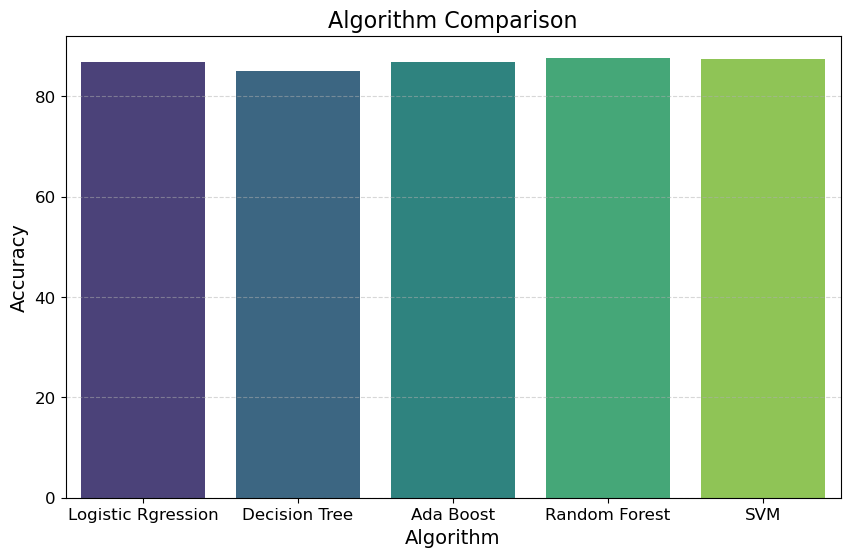

In [121]:
comparison = {'Algorithm': ['Logistic Rgression', 'Decision Tree', 'Ada Boost','Random Forest', 'SVM'],
              'Accuracy': [86.94, 85.11, 86.94, 87.71, 87.42]}

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=comparison, palette='viridis')

plt.title('Algorithm Comparison', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### The Random Forest Classifier achieved the highest accuracy of 87.71% and can be used for predicting the Target variable.